# Import Library dan eksplorasi

In [ ]:
# Install dependencies
!pip install yfinance
!pip install tensorflow scikit-learn

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Download historical stock data
df = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
df = df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2019-01-02 to 2024-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  1509 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB
None


In [ ]:
df.head()

Price,Close
Ticker,AAPL
Date,
2019-01-02,37.617844
2019-01-03,33.870838
2019-01-04,35.316757
2019-01-07,35.238152
2019-01-08,35.909897


# Tahap Preprosesing

In [ ]:
print("Cek Nilai Kosong:")
print(df.isnull().sum())

print("\nCek Data Duplikat:")
print(df.duplicated().sum())

print("\nStatistik Deskriptif:")
print(df.describe())

Cek Nilai Kosong:
Price  Ticker
Close  AAPL      0
dtype: int64

Cek Data Duplikat:
15

Statistik Deskriptif:
Price         Close
Ticker         AAPL
count   1509.000000
mean     134.892332
std       54.048610
min       33.870838
25%       88.662407
50%      143.241913
75%      172.032501
max      258.396667


In [ ]:
df_cleaned = df.drop_duplicates()

df.dropna(inplace=True)

print("Data setelah dibersihkan:")
print(df_cleaned.info())

Data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2019-01-02 to 2024-12-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  1494 non-null   float64
dtypes: float64(1)
memory usage: 23.3 KB
None


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df)

# Mulai buat model

In [ ]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, 60)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Split data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# LSTM untuk prediksi harga
model_pred = Sequential()
model_pred.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_pred.add(Dropout(0.2))
model_pred.add(LSTM(units=50, return_sequences=False))
model_pred.add(Dropout(0.2))
model_pred.add(Dense(units=1))

model_pred.compile(optimizer='adam', loss='mean_squared_error')
model_pred.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0640
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0038
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0029
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0021
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0020
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0021
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0019
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0018
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0018
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0017
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0019
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0018
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0017
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0017
Epoch 15/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0015
Epoc

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


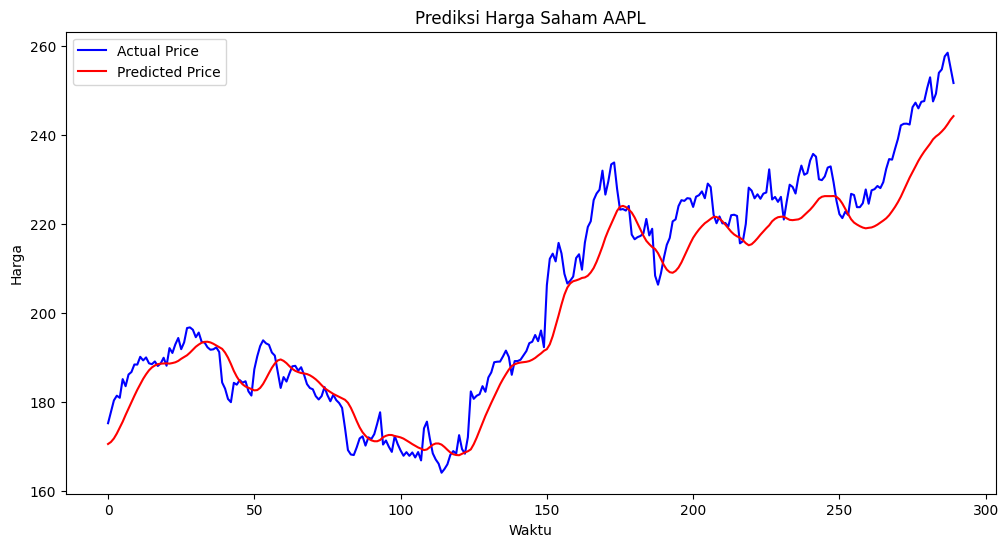

In [ ]:
# Prediksi untuk 300 titik kedepan
predicted = model_pred.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(real_prices, color='blue', label='Actual Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title('Prediksi Harga Saham AAPL')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Evaluasi Model Terhadap Data Uji ")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

Evaluasi Model Terhadap Data Uji 
Mean Squared Error (MSE): 52.8966
Root Mean Squared Error (RMSE): 7.2730
Mean Absolute Error (MAE): 5.7246
R^2 Score: 0.9117


In [ ]:
# Prediksi 30 hari ke depan
forecast_input = data_scaled[-60:]  # Ambil 60 hari terakhir
forecast_input = forecast_input.reshape(1, -1)
forecast_input = list(forecast_input[0])

future_predictions = []
for _ in range(30):
    input_seq = np.array(forecast_input[-60:])  # Ambil 60 data terakhir
    input_seq = input_seq.reshape(1, 60, 1)
    next_pred = model_pred.predict(input_seq, verbose=0)[0][0]
    future_predictions.append(next_pred)
    forecast_input.append(next_pred)

# Balik ke skala harga asli
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

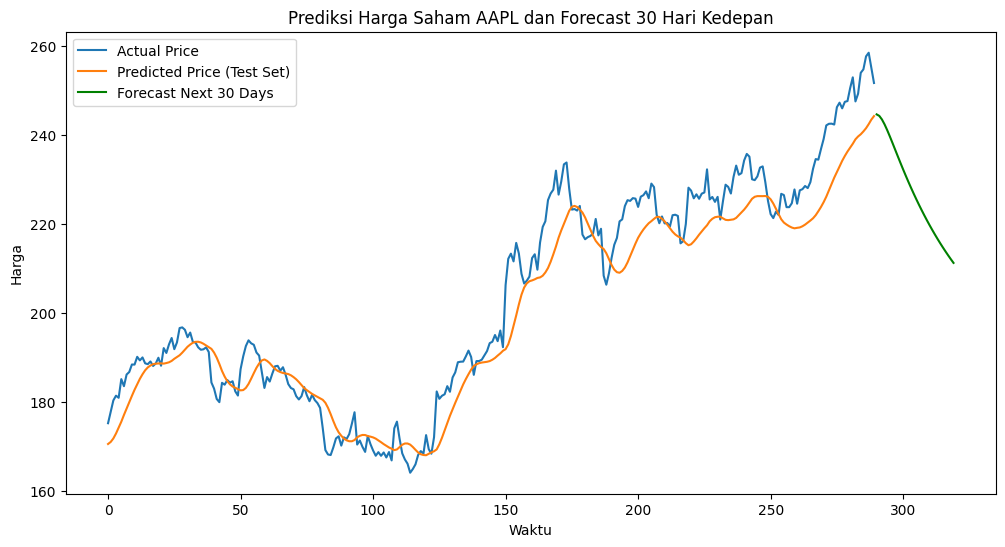

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price (Test Set)')
plt.plot(range(len(real_prices), len(real_prices)+30), future_prices, color='green', label='Forecast Next 30 Days')
plt.title('Prediksi Harga Saham AAPL dan Forecast 30 Hari Kedepan')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.legend()
plt.show()

# Bangun model klasifikasi

In [ ]:
# Klasifikasi sinyal Buy, Hold, Sell
signal = []
for i in range(1, len(real_prices)):
    change = real_prices[i] - real_prices[i - 1]
    if change > 1.0:
        signal.append(2)  # Buy
    elif change < -1.0:
        signal.append(0)  # Sell
    else:
        signal.append(1)  # Hold

X_cls = X_test[1:]
y_cls = np.array(signal)

model_cls = Sequential()
model_cls.add(LSTM(50, return_sequences=True, input_shape=(X_cls.shape[1], 1)))
model_cls.add(Dropout(0.2))
model_cls.add(LSTM(50))
model_cls.add(Dropout(0.2))
model_cls.add(Dense(3, activation='softmax'))

model_cls.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cls.fit(X_cls, y_cls, epochs=20, batch_size=32, verbose=1)

pred_cls = model_cls.predict(X_cls)
pred_labels = np.argmax(pred_cls, axis=1)

print("\nClassification Report:")
print(classification_report(y_cls, pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_cls, pred_labels))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.2731 - loss: 1.1059
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3871 - loss: 1.0934
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4046 - loss: 1.0866
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3657 - loss: 1.1005
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3544 - loss: 1.0933
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3783 - loss: 1.1000
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.3551 - loss: 1.0931
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.3945 - loss: 1.0898
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3736 - loss: 1.0922
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3911 - loss: 1.0937
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3702 - loss: 1.0952
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3544 - l

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
